 - Kaggle: 
 https://www.kaggle.com/competitions/mmf-data-science-2022/data

ENV set up

In [ ]:
! pip install h2o

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import pandas as pd
import numpy as np
from tqdm import tqdm
import h2o
from h2o.automl import H2OAutoML
from sklearn.preprocessing import OrdinalEncoder
from sklearn.metrics import accuracy_score
import seaborn as sns

# Data manipulation

In [ ]:
# import dataset
df_train = pd.read_csv('/content/train.csv', index_col=0)
df_test = pd.read_csv('/content/test.csv', index_col=0)

In [ ]:
df_train.columns.values

array(['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'price', 'x',
       'y', 'z'], dtype=object)

In [ ]:
features = ['carat','cut','color','clarity','depth','table','x','y','z']

In [ ]:
df_train

,carat,cut,color,clarity,depth,table,price,x,y,z
0,1.01,Very Good,E,SI2,60.0,60.0,4540,6.57,6.49,3.92
1,1.10,Premium,H,VS2,62.5,58.0,5729,6.59,6.54,4.10
2,1.50,Good,E,SI2,61.5,65.0,6300,7.21,7.17,4.42
3,1.53,Premium,E,SI1,61.3,59.0,12968,7.40,7.35,4.52
4,0.84,Fair,D,SI2,64.5,60.0,2167,5.92,5.84,3.79
...,...,...,...,...,...,...,...,...,...,...
43149,1.05,Very Good,I,VS2,62.4,59.0,4975,6.48,6.51,4.05
43150,0.47,Ideal,D,VS1,61.0,55.0,1617,5.03,5.01,3.06
43151,0.33,Very Good,F,IF,60.3,58.0,1014,4.49,4.46,2.70
43152,0.90,Premium,J,SI1,62.8,59.0,2871,6.13,6.03,3.82


In [ ]:
df_test

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
0,0.24,Ideal,G,VVS1,62.1,56.0,3.97,4.00,2.47
1,1.21,Very Good,F,VS2,62.9,54.0,6.78,6.82,4.28
2,0.50,Fair,E,SI1,61.7,68.0,5.09,5.03,3.12
3,0.50,Ideal,D,SI2,62.8,56.0,5.06,5.03,3.17
4,1.55,Ideal,E,SI2,62.3,55.0,7.44,7.37,4.61
...,...,...,...,...,...,...,...,...,...
10784,0.53,Ideal,F,VS2,62.3,55.0,5.20,5.17,3.23
10785,0.41,Premium,G,SI1,61.3,60.0,4.75,4.81,2.93
10786,0.51,Premium,G,VS2,62.4,58.0,5.11,5.12,3.19


In [ ]:
df_train.describe()

,carat,depth,table,price,x,y,z
count,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000,43154.000000
mean,0.799047,61.742925,57.459010,3946.777054,5.733798,5.737574,3.539338
std,0.475214,1.428410,2.227191,3998.657385,1.123004,1.150325,0.696203
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,953.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2406.500000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5367.000000,6.540000,6.540000,4.040000
max,4.500000,79.000000,79.000000,18823.000000,10.230000,58.900000,8.060000


In [ ]:
df_test.describe()

,carat,depth,table,x,y,z
count,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000,10789.000000
mean,0.793487,61.774910,57.450218,5.720597,5.722336,3.536297
std,0.469100,1.449154,2.263829,1.116605,1.108576,0.742402
min,0.200000,43.000000,51.000000,0.000000,0.000000,0.000000
25%,0.400000,61.100000,56.000000,4.710000,4.720000,2.910000
50%,0.700000,61.900000,57.000000,5.690000,5.710000,3.520000
75%,1.040000,62.600000,59.000000,6.520000,6.520000,4.030000
max,5.010000,78.200000,95.000000,10.740000,10.540000,31.800000


In [ ]:
df_train.loc[(df_train.x == 0) | (df_train.y == 0) | (df_train.z == 0)]

,carat,cut,color,clarity,depth,table,price,x,y,z
5973,1.01,Premium,F,SI2,59.2,58.0,3837,6.50,6.47,0.0
6234,1.00,Very Good,H,VS2,63.3,53.0,5139,0.00,0.00,0.0
6672,1.00,Premium,G,SI2,59.1,59.0,3142,6.55,6.48,0.0
18590,1.56,Ideal,G,VS2,62.2,54.0,12800,0.00,0.00,0.0
21968,2.25,Premium,H,SI2,62.8,59.0,18034,0.00,0.00,0.0
24481,2.20,Premium,H,SI1,61.2,59.0,17265,8.42,8.37,0.0
25902,1.20,Premium,D,VVS1,62.1,59.0,15686,0.00,0.00,0.0
26405,1.15,Ideal,G,VS2,59.2,56.0,5564,6.88,6.83,0.0
28391,2.02,Premium,H,VS2,62.7,53.0,18207,8.02,7.95,0.0
30252,1.12,Premium,G,I1,60.4,59.0,2383,6.71,6.67,0.0


In [ ]:
df_test.loc[(df_test.x == 0) | (df_test.y == 0) | (df_test.z == 0)]

,carat,cut,color,clarity,depth,table,x,y,z
id,,,,,,,,,
1076,2.80,Good,G,SI2,63.8,58.0,8.9,8.85,0.0
2576,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0
4365,0.71,Good,F,SI2,64.1,60.0,0.0,0.00,0.0
5956,1.14,Fair,G,VS1,57.5,67.0,0.0,0.00,0.0


### Checking missing data

In [ ]:
df_train.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [ ]:
df_test.isna().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
dtype: int64

## Encoding

### Cut (Ordinal Encoding)

In [ ]:
df_train['cut'].value_counts()

Ideal        17235
Premium      11059
Very Good     9672
Good          3906
Fair          1282
Name: cut, dtype: int64

In [ ]:
# quality of the cut (Fair, Good, Very Good, Premium, Ideal)
cut_mapper = {'Fair':1, 'Good':2, 'Very Good':3, 
                'Premium':4, 'Ideal':5}

df_train['cut'] = df_train['cut'].replace(cut_mapper)
df_test['cut'] = df_test['cut'].replace(cut_mapper)

### Color (Ordinal Encoding)

In [ ]:
df_train['color'].value_counts()

G    8993
E    7813
F    7608
H    6731
D    5462
I    4306
J    2241
Name: color, dtype: int64

In [ ]:
# diamond colour, from J (worst) to D (best)
color_mapper = {'J':1, 'I':2, 'H':3, 'G':4, 'F':5, 'E':6, 'D':7}

df_train['color'] = df_train['color'].replace(color_mapper)
df_test['color'] = df_test['color'].replace(color_mapper)

### clarity (Ordinal Encoding)

In [ ]:
df_train['clarity'].value_counts()

SI1     10546
VS2      9798
SI2      7259
VS1      6543
VVS2     4072
VVS1     2929
IF       1428
I1        579
Name: clarity, dtype: int64

In [ ]:
# clarity a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))
clarity_mapper = {'I1':1, 'SI2':2, 'SI1':3, 'VS2':4, 'VS1':5, 'VVS2':6, 'VVS1':7, 'IF':8}

df_train['clarity'] = df_train['clarity'].replace(clarity_mapper)
df_test['clarity'] = df_test['clarity'].replace(clarity_mapper)

## Correlation

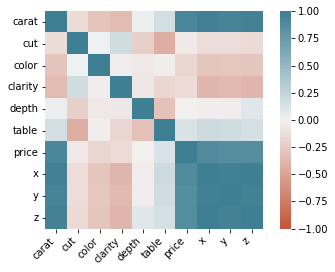

In [ ]:
corr = df_train.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

## Drop high correlated columns

In [ ]:
# df_train = df_train.drop(columns=['x', 'y', 'z'])
# df_test = df_test.drop(columns=['x', 'y', 'z'])
# df_train

# Train - AutoML H2O

## H2O training and testing data setup

In [ ]:
h2o.init()

Checking whether there is an H2O instance running at http://localhost:54321 . connected.


H2O_cluster_uptime:,41 mins 22 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.38.0.2
H2O_cluster_version_age:,19 days
H2O_cluster_name:,H2O_from_python_unknownUser_z6d2f4
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,2.675 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"locked, healthy"


In [ ]:
# convert pandas DataFrame into H2O Frame
train_h2o = h2o.H2OFrame(df_train)
# Describe  the train h20Frame
train_h2o.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:43154
Cols:10

,carat,cut,color,clarity,depth,table,price,x,y,z
type,real,int,int,int,real,real,int,real,real,real
mins,0.2,1.0,1.0,1.0,43.0,43.0,326.0,0.0,0.0,0.0
mean,0.7990466700653422,3.905107290170066,4.40677573341989,4.055267182648173,61.7429253371644,57.459009593548494,3946.7770542707276,5.733798489131949,5.737574268897439,3.5393377207211567
maxs,4.5,5.0,7.0,8.0,79.0,79.0,18823.0,10.23,58.9,8.06
sigma,0.4752142529359397,1.1153275580212365,1.7019705617055763,1.6444934252145145,1.4284096776658515,2.2271914926518424,3998.657384978419,1.1230044594149664,1.150324703353283,0.6962034700495239
zeros,0,0,0,0,0,0,0,5,4,16
missing,0,0,0,0,0,0,0,0,0,0
0,1.01,3.0,6.0,2.0,60.0,60.0,4540.0,6.57,6.49,3.92
1,1.1,4.0,3.0,4.0,62.5,58.0,5729.0,6.59,6.54,4.1
2,1.5,2.0,6.0,2.0,61.5,65.0,6300.0,7.21,7.17,4.42


In [ ]:
# load test dataset
test_h2o = h2o.H2OFrame(df_test)
# selecting feature and label columns
 
x = test_h2o.columns
y = 'price'

# Describe  the train h20Frame
test_h2o.describe()

Parse progress: |████████████████████████████████████████████████████████████████| (done) 100%


Rows:10789
Cols:9

,carat,cut,color,clarity,depth,table,x,y,z
type,real,int,int,int,real,real,real,real,real
mins,0.2,1.0,1.0,1.0,43.0,51.0,0.0,0.0,0.0
mean,0.7934868847900667,3.899990731300405,4.402261562702762,4.0338307535452715,61.77490963017878,57.450217814440705,5.720596904254336,5.72233571229955,3.5362971545092146
maxs,5.01,5.0,7.0,8.0,78.2,95.0,10.74,10.54,31.8
sigma,0.4690999736312758,1.1215971482927005,1.6976227357937888,1.657463982548092,1.4491536032533503,2.263828923095095,1.116605207355366,1.108576148547034,0.7424018389539885
zeros,0,0,0,0,0,0,3,3,4
missing,0,0,0,0,0,0,0,0,0
0,0.24,5.0,4.0,7.0,62.1,56.0,3.97,4.0,2.47
1,1.21,3.0,5.0,4.0,62.9,54.0,6.78,6.82,4.28
2,0.5,1.0,6.0,3.0,61.7,68.0,5.09,5.03,3.12


In [ ]:
x

['carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y', 'z']

## Training model

In [ ]:
# callh20automl  function
aml = H2OAutoML(max_runtime_secs = 1800,
                # exclude_algos =['DeepLearning'],
                seed = 1,
                # stopping_metric ='logloss',
                sort_metric ='RMSE',
                balance_classes = False
)
# train model and record time % time
aml.train(x = x, y = y, training_frame = train_h2o)

AutoML progress: |███████████████████████████████████████████████████████████████| (done) 100%


,mean,sd,cv_1_valid,cv_2_valid,cv_3_valid,cv_4_valid,cv_5_valid
mae,263.54608,4.484973,264.1359,255.90189,264.25452,267.4406,265.99744
mean_residual_deviance,273829.94,14946.857,277852.3,250898.16,271031.62,292037.22,277330.34
mse,273829.94,14946.857,277852.3,250898.16,271031.62,292037.22,277330.34
null_deviance,138003841000.0000000,2979036420.0000000,138583753000.0000000,132878778000.0000000,139187945000.0000000,140644991000.0000000,138723770000.0000000
r2,0.9828816,0.0005982,0.9826363,0.9837850,0.9830084,0.9821493,0.9828289
residual_deviance,2363404800.0000000,130240432.0000000,2406201090.0000000,2153458940.0000000,2365021950.0000000,2510351870.0000000,2381990400.0000000
rmse,523.1295,14.380178,527.117,500.89734,520.607,540.40466,526.62164
rmsle,0.0951333,0.0077539,0.0922208,0.0906094,nan,0.1067182,0.0909849


In [ ]:
# View the H2O aml leaderboard
lb = aml.leaderboard
# Print all rows
lb.head(rows = lb.nrows)

model_id,rmse,mse,mae,rmsle,mean_residual_deviance
StackedEnsemble_AllModels_3_AutoML_2_20221116_13218,523.291,273834,263.551,nan,273834
StackedEnsemble_AllModels_4_AutoML_2_20221116_13218,523.403,273950,263.602,nan,273950
StackedEnsemble_AllModels_2_AutoML_2_20221116_13218,524.105,274686,264.507,nan,274686
StackedEnsemble_BestOfFamily_4_AutoML_2_20221116_13218,524.167,274751,264.039,0.0907774,274751
StackedEnsemble_AllModels_1_AutoML_2_20221116_13218,524.652,275260,264.42,nan,275260
StackedEnsemble_BestOfFamily_3_AutoML_2_20221116_13218,525.2,275835,265.133,0.0921825,275835
StackedEnsemble_BestOfFamily_2_AutoML_2_20221116_13218,527.365,278114,264.741,nan,278114
GBM_4_AutoML_2_20221116_13218,528.056,278843,265.586,nan,278843
GBM_3_AutoML_2_20221116_13218,531.706,282712,272.006,nan,282712
GBM_2_AutoML_2_20221116_13218,535.559,286823,276.504,nan,286823


**Best Model**

In [ ]:
best_model = aml.get_best_model()
print(best_model)

Model Details
H2OStackedEnsembleEstimator : Stacked Ensemble
Model Key: StackedEnsemble_AllModels_3_AutoML_2_20221116_13218

No summary for this model

ModelMetricsRegressionGLM: stackedensemble
** Reported on train data. **

MSE: 150212.48043105644
RMSE: 387.57254860355687
MAE: 210.0402618802448
RMSLE: 0.0788595708768137
Mean Residual Deviance: 150212.48043105644
R^2: 0.9906111224361756
Null degrees of freedom: 9989
Residual degrees of freedom: 9982
Null deviance: 159830386695.48978
Residual deviance: 1500622679.5062537
AIC: 147447.2549018047

ModelMetricsRegressionGLM: stackedensemble
** Reported on cross-validation data. **

MSE: 273833.8050778735
RMSE: 523.2913195132072
MAE: 263.55098262614587
RMSLE: NaN
Mean Residual Deviance: 273833.8050778735
R^2: 0.9828734953578816
Null degrees of freedom: 43153
Residual degrees of freedom: 43146
Null deviance: 690019232699.9252
Residual deviance: 11817024024.330555
AIC: 662783.7655009371

Cross-Validation Metrics Summary: 
                    

In [ ]:
# Get the metalearner model of top model
metalearner = h2o.get_model(best_model.metalearner()['name'])
 
# list baselearner models :
metalearner.varimp()

/usr/local/lib/python3.7/dist-packages/h2o/estimators/stackedensemble.py:929: H2ODeprecationWarning: The usage of stacked_ensemble.metalearner()['name'] will be deprecated. Metalearner now returns the metalearner object. If you need to get the 'name' please use stacked_ensemble.metalearner().model_id
  H2ODeprecationWarning


[('GBM_4_AutoML_2_20221116_13218', 2418.34521484375, 1.0, 0.6101784712486127),
 ('GBM_3_AutoML_2_20221116_13218',
  926.7859497070312,
  0.38323145265549324,
  0.23383958191571397),
 ('GBM_2_AutoML_2_20221116_13218',
  182.6152801513672,
  0.07551249467217443,
  0.0460760985592364),
 ('XGBoost_grid_1_AutoML_2_20221116_13218_model_2',
  124.52870178222656,
  0.05149335215579319,
  0.03142013489788834),
 ('GBM_5_AutoML_2_20221116_13218',
  122.67561340332031,
  0.05072708918906204,
  0.030952577732273903),
 ('XGBoost_grid_1_AutoML_2_20221116_13218_model_3',
  99.246826171875,
  0.04103914758021318,
  0.025041204331840677),
 ('GBM_grid_1_AutoML_2_20221116_13218_model_5',
  89.1431884765625,
  0.03686123384263072,
  0.022491931314434038),
 ('GBM_1_AutoML_2_20221116_13218', 0.0, 0.0, 0.0),
 ('XGBoost_grid_1_AutoML_2_20221116_13218_model_15', 0.0, 0.0, 0.0),
 ('GBM_grid_1_AutoML_2_20221116_13218_model_2', 0.0, 0.0, 0.0),
 ('XGBoost_grid_1_AutoML_2_20221116_13218_model_9', 0.0, 0.0, 0.0),
 ('

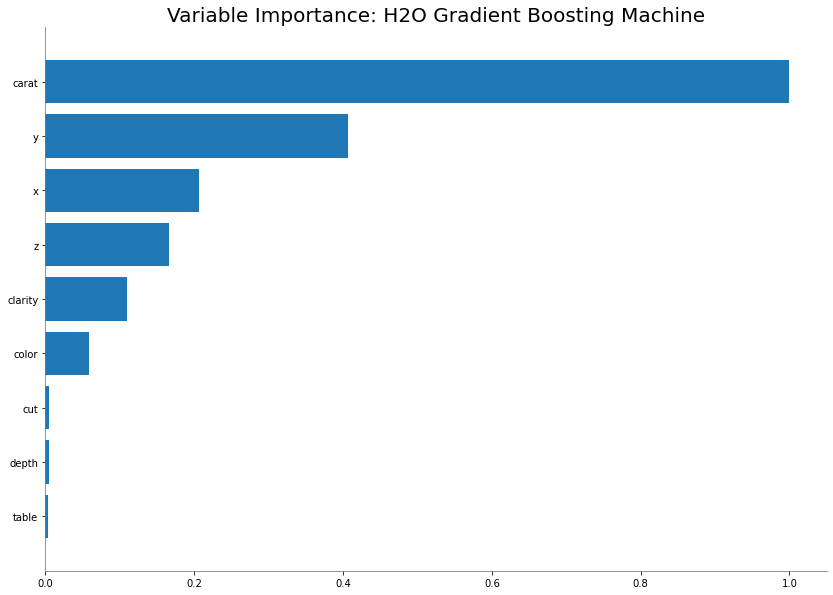

<Figure size 432x288 with 0 Axes>

In [ ]:
# model performance on test dataset
base_model = h2o.get_model('GBM_4_AutoML_2_20221116_13218')
base_model.varimp_plot(num_of_features = 9)

# Predict using best model

In [ ]:
predicted_result = best_model.predict(test_h2o)
predicted_result = predicted_result.as_data_frame()

stackedensemble prediction progress: |███████████████████████████████████████████| (done) 100%


In [ ]:
predicted_result.index.name = 'id'
predicted_result.rename(columns = {'predict':'price'}, inplace = True)
predicted_result

,price
id,
0,552.045684
1,8275.666441
2,1333.209036
3,1225.325815
4,9983.003200
...,...
10784,1708.610027
10785,790.831206
10786,1506.571179


In [ ]:
predicted_result.to_csv('submission.csv')